# Predictive Modeling of Stock Data
By Shahbab Ahmed, Isaiah Erven, Amirul Miah, and Tanbirul Miah

Created for SI 370

# Statement of Purpose
We hope to analyze historical trends to give us some sort of guidance in forecasting future activity. We hope to synthesize newer machine learning algorithms with classic stock data to help people make investment decisions. We will divide our data based on which exchange the stock is traded on (NYSE vs. NASDAQ), to account for possible differences. We also hope to use several technical indicators to observe what correlates to an increase or decrease in stock price. Using our findings from analyzing the historical data, we will form predictive models to forecast future stock prices. 

We will use the following tools for our data analysis:
Technical analysis: This portion of the project will involve incorporating technical indicators into our dataset to use as features for our models
Technical indicators source: https://www.investopedia.com/top-7-technical-analysis-tools-4773275
Linear Regression: We will train and test a linear regression model that uses historical stock data to predict stock prices
Decision Trees: Create a model that uses historical stock data to make a decision whether to invest or not, based on technical indicators and any other features we may implement.
Comparative analysis of different markets: We will run some form of comparative analysis test (i.e. t-tests, ANOVA) to explore if there are any significant differences in the different stock markets: NYSE, NASDAQ, and NYSE MKT
Data Visualization: Data visualizations to help identify key identifiers that back up our models’ predictions. Will utilize packages such as seaborn and matplotlib.
NLP (stretch goal): We will train a NLP model to portray the correlation of stocks and their appearance on financial news articles. 

Source of data: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Exploratory Data Analysis

In [30]:
def create_etf_df(etf):
    #Read in stock data from txt file
    with open('ETFs/' + etf + ".us.txt") as f:
        lines = f.readlines()
        etf_data = pd.DataFrame(lines)
        f.close()
        
    
    etf_dict = {"Date":[], "Open":[], "High":[], "Low":[], "Close":[], "Volume":[]}
        
    for i in lines[1:]:
        
        #create variables by splitting and slicing data
        Date = i.split(",")[:][0]
        Open = i.split(",")[:][1]
        High = i.split(",")[:][2]
        Low = i.split(",")[:][3]
        Close = i.split(",")[:][4]
        Volume = i.split(",")[:][5]
        OpenInt = i.split(",")[:][6]
        
        #appending data to etf_dict keys
        etf_dict["Date"].append(Date)
        etf_dict["Open"].append(Open)
        etf_dict["High"].append(High)
        etf_dict["Low"].append(Low)
        etf_dict["Close"].append(Close)
        etf_dict["Volume"].append(Volume)
        
    #move dictionary data into Pandas dataframe    
    etf_df = pd.DataFrame(etf_dict)
    etf_df = etf_df.set_index("Date")
    
    #adds average of open,high,low,and close
    etf_df["Average Price"] = etf_df.iloc[:,:3].astype(float).mean(axis=1)
    return etf_df

In [31]:
import pandas as pd
import numpy as np
import talib

"""
TA Functions
Parameters
----------
df : DataFrame
timeperiod : int
    The last x amount of days

Returns
-------
Copy of dataframe we passed in plus a new column containing the respective indicator we called
"""

#Average true range - represents market volatility
def add_ATR(df, timeperiod=1):
    temp = df.copy()
    temp['ATR'] = talib.ATR(df.iloc[:, 0], df.iloc[:, 0], df.iloc[:, 0], timeperiod=timeperiod)
    return temp

#Relative strengeth index - represents stock momentum
def add_RSI(df, timeperiod=1):
    temp = df.copy()
    temp['RSI'] = talib.RSI(df.iloc[:, 0], timeperiod=timeperiod)
    return temp

#Simple moving average - average closing price in set period of time
def add_SMA(df, timeperiod=1):

    temp = df.copy()
    temp['SMA'] = talib.SMA(df.iloc[:, 0], timeperiod)
    return temp

#Exponential moving average - average adjusted to analyze long term trends
def add_EMA(df, timeperiod=1):

    temp = df.copy()
    temp['EMA'] = talib.EMA(df.iloc[:, 0], timeperiod)
    return temp

#On balance volume - Represents buying and selling pressure
def add_OBV(df):
    
    temp = df.copy()
    temp['OBV'] = talib.OBV(df.iloc[:, 0], df["Volume"])
    return temp

In [32]:
#Add all technical indicators as new column
def add_ta(df, timeperiod):
    df = add_ATR(df,timeperiod)
    df = add_RSI(df,len(df) - 1825)
    df = add_SMA(df,timeperiod)
    df = add_EMA(df,timeperiod)
    df = add_OBV(df)
    
    return df

In [33]:
# "VTI" is an ETF tracking the entire stock market and "QQQ" is an ETF tracking the NASDAQ
total_market = create_etf_df("vti")
nasdaq = create_etf_df("qqq")

In [34]:
# Calculate technical indicators for both dataframes and drop columns that are not needed for visualization
total_market = add_ta(total_market, 2).drop(["Open", "High", "Low", "Close", "Volume"], axis=1)
nasdaq = add_ta(nasdaq, 2).drop(["Open", "High", "Low", "Close", "Volume"], axis=1)

In [35]:
total_market.head()

,Average Price,ATR,RSI,SMA,EMA,OBV
Date,,,,,,
2005-02-25,51.827333,NaN,NaN,NaN,NaN,572137.0
2005-02-28,51.975000,NaN,NaN,51.9000,51.900000,807018.0
2005-03-01,52.055667,0.331500,NaN,52.0545,51.944000,704415.0
2005-03-02,52.072333,0.202250,NaN,51.9295,51.910000,478822.0
2005-03-03,52.173667,0.269125,NaN,52.0610,52.122667,624235.0


In [36]:
total_market.describe()

,Average Price,ATR,RSI,SMA,EMA,OBV
count,3201.000000,3199.000000,1825.000000,3200.000000,3200.000000,3.201000e+03
mean,72.489717,0.505842,51.728436,72.513746,72.513693,-2.340656e+07
std,24.265577,0.378190,0.970626,24.255256,24.254104,1.115856e+08
min,29.998667,0.045512,49.660432,30.053500,30.006448,-2.740869e+08
25%,54.772333,0.271008,50.753816,54.744000,54.752914,-1.311969e+08
50%,63.031667,0.415310,52.018408,63.058000,63.053188,1.095580e+06
75%,94.804000,0.622080,52.562523,94.801125,94.905932,7.521912e+07
max,133.013333,4.703530,53.537231,132.965000,133.000694,2.307101e+08


In [37]:
nasdaq.describe()

,Average Price,ATR,RSI,SMA,EMA,OBV
count,4701.000000,4699.000000,1825.000000,4700.000000,4700.000000,4.701000e+03
mean,58.374811,0.635296,50.950016,58.389894,58.389879,-6.512890e+08
std,31.196707,0.634781,0.624564,31.195023,31.193388,1.775198e+09
min,17.977333,0.041098,49.847443,17.903000,17.954397,-7.296473e+09
25%,34.879000,0.278528,50.377585,34.889375,34.887013,-1.696963e+09
50%,45.690000,0.443791,51.004015,45.726000,45.757785,-4.094485e+08
75%,79.235333,0.744613,51.447089,79.314500,79.450550,6.390496e+08
max,153.990000,8.151813,52.341450,153.740000,153.671769,4.193787e+09


# Data Visualization

In [38]:
import matplotlib.pyplot
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.axes as ax

In [39]:
def plot_market_visualizations(df, title):
    fig = plt.figure(figsize=(20,40))
    #plot each column in stock dataframe
    for i in range(6):
        ax = plt.subplot(6, 2, i + 1)
        ax.plot(df.index, df[df.columns[i]])
        ax.set_title(title + " " + df.columns[i] + " over time")
        ax.set_xlabel("Date")
        ax.set_ylabel(df.columns[i])
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.xticks(rotation=30)
    fig.tight_layout()

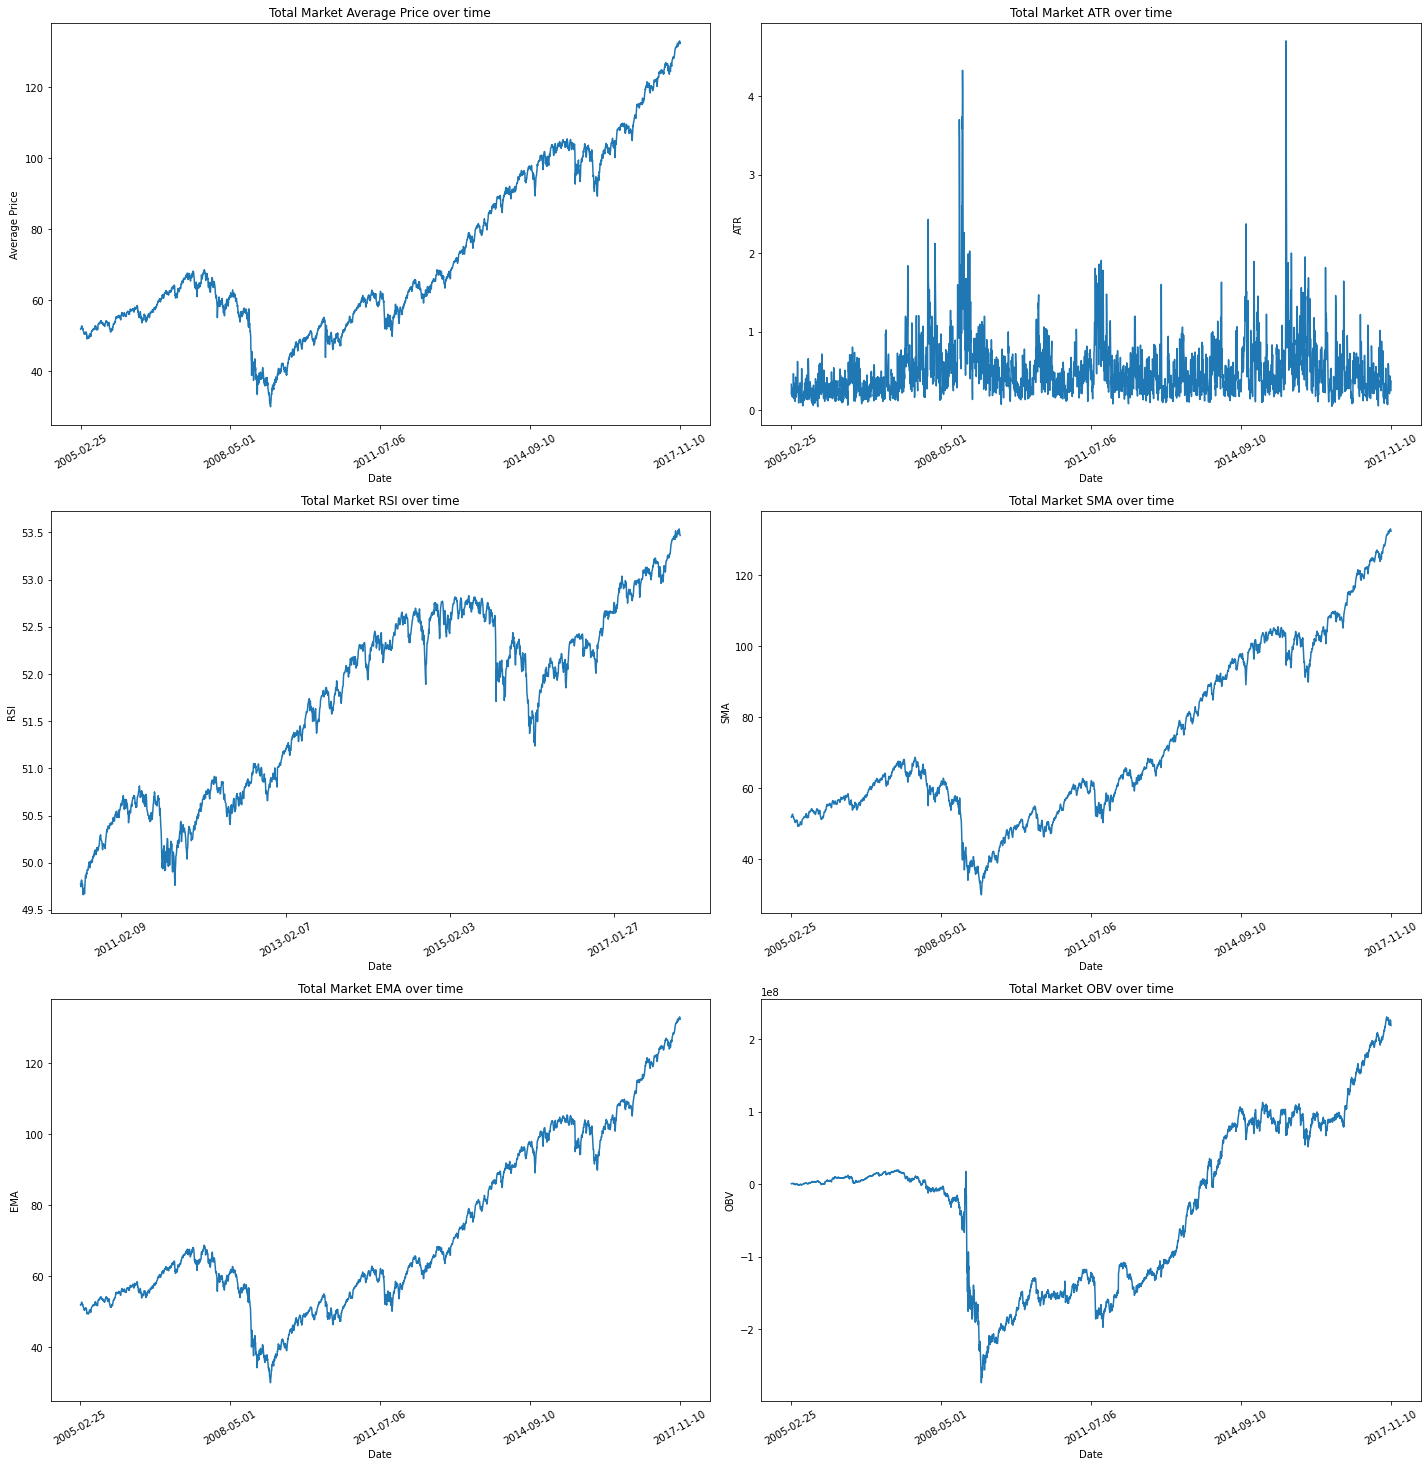

In [40]:
plot_market_visualizations(total_market, "Total Market")

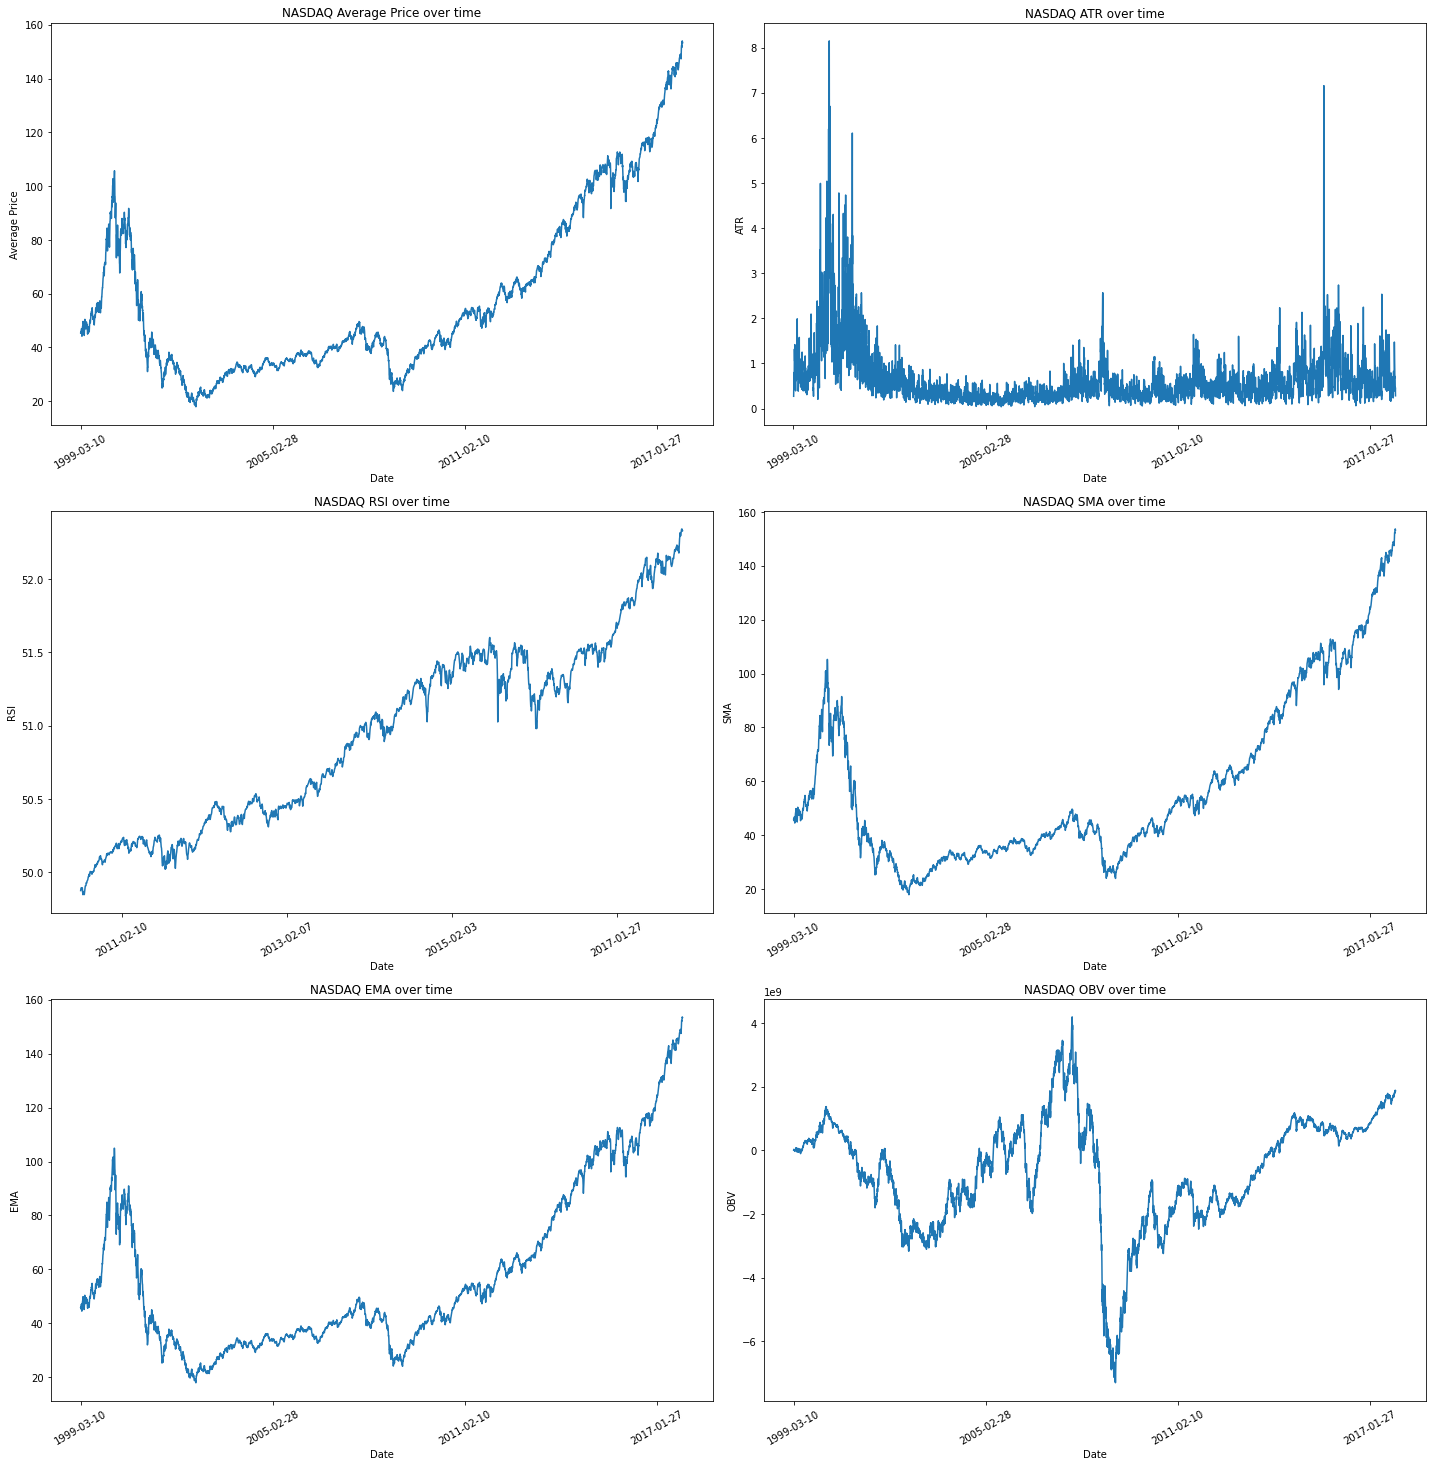

In [41]:
plot_market_visualizations(nasdaq, "NASDAQ")

# Machine Learning Techniques

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
#setup x and y values from both dataframes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "Linear Regression"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearRegression()
    ]

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # evaluate predictions
    accuracy = clf.score(x_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

# Visualizations of Findings

# Summary of Findings

# Limitations/Challenges

The main limitations of these forecasts relates to the variety of factors that contribute to stock prices in the modern stock market. The stock market was previously based primarily on performance metrics that companies kept track of, but this has not been the case in recent times. The stock market always represents perceived values in companies and many things can affect this perception. This includes the pandemic, news stories, reddit events, and corporate branding. There are also newer platforms like Robinhood that are allowing even more people access to the stock market. This project analyzes the results of the combination of all of these factors, but does not analyze to what extent each feature contributes.

# Future Recommendations

Future work surrounding each of the contributing factors could be extremely promising. Extensive research on what causes stock market crashes (panic, pandemics, politics) could be added to account for even more situations. Even smaller events like news stories and viral events on reddit can now affect stock prices. Individual influencers like Warren Buffet and Elon Mask can also cause stock market shifts. Using models that attempt to take into account these smaller events could also aid in providing recommendations and projections surrounding the stock market.

Future work on analysis of individual companies instead of ETFs representing larger portions of the market would also be very effective. This would need a lot of work surrounding accounting analysis of companies. The pure number of companies listed on the stock exchange make this a massive project. This would mean looking into the financial health of companies and analyzing what factors contribute to the stock price.